In [1]:
%matplotlib inline

In [2]:
import cv2

In [3]:
import urllib.request as urlreq

In [4]:
import os

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pylab import rcParams

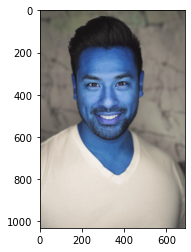

In [7]:
# save picture's url in pics_url variable
pics_url = "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80"

# save picture's name as pic
pic = "image.jpg"

# download picture from url and save locally as image.jpg
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)
#plt.show(image)

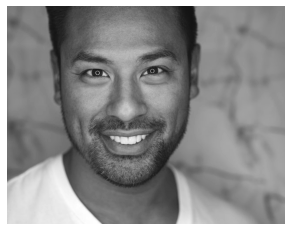

In [8]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

# set dimension for cropping image
x, y, width, depth = 50, 200, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes and show image
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

In [9]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

File exists


Faces:
 [[103  28 330 330]]


Text(0.5, 1.0, 'Face Detection')

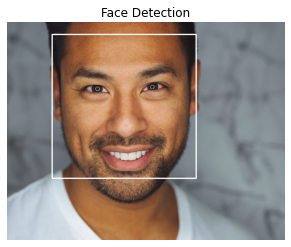

In [10]:
# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

File exists


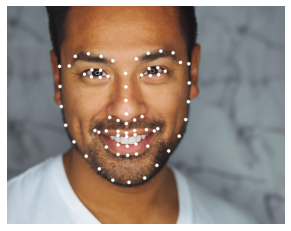

In [11]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

fig = plt.figure()

for landmark in landmarks:
    for x,y in landmark[0]:
        # display landmarks on "image_cropped"
        # with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (int(x), int(y)), 1, (255, 255, 255), 5)
plt.axis("off")
plt.imshow(image_cropped)

In [12]:
fig.savefig('saved.png')